# Goal
Predict whether the accepted loan would be properly paid back or not

log:
drop columns and load all data
move on to feature engineering


Make it better:
Can we use forward and backward or stepwise method to select the important parameter?

Should we treat ordinal value as catagory values or numeric values?


## import data

In [1]:
# load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleansing

In [2]:
# import data
reader = pd.read_csv('accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv', chunksize=10000)
mid=[]
for chunk in reader:
    chunk=chunk[chunk['loan_status'].apply( lambda x: x not in ['Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'])]
    # drop columns with more than 50% missing values
    chunk.rename(columns={'verification_status_joint':'verified_status_joint'}, inplace=True)

    chunk = chunk.drop(columns= ['verified_status_joint','sec_app_mths_since_last_major_derog', 'sec_app_revol_util',
       'revol_bal_joint', 'sec_app_inq_last_6mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts',
       'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_fico_range_high',
       'sec_app_fico_range_low', 'dti_joint', 'annual_inc_joint',
       'mths_since_last_record', 'mths_since_recent_bc_dlq',
       'mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
       'mths_since_last_delinq'])

    #  drop columns with more than 20% of missing values
    chunk = chunk.drop(columns=['open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'])

    # drop column without explaination
    chunk = chunk.drop(columns=['debt_settlement_flag', 'debt_settlement_flag_date', 'deferral_term',\
         'disbursement_method', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_flag',\
            'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', \
            'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'open_act_il', \
            'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'sec_app_open_act_il',\
            'settlement_amount', 'settlement_date', 'settlement_percentage', 'settlement_status', 'settlement_term'])
    # drop column with high correlation
    chunk = chunk.drop(columns=['out_prncp_inv','funded_amnt','funded_amnt_inv','tot_hi_cred_lim','total_il_high_credit_limit'])
    # columns that are not related to prediction
    chunk = chunk.drop(columns=['url','desc','member_id','id','emp_title','zip_code','policy_code'])# sub_grade

    # drop column with date
    chunk = chunk.drop(columns= ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d','sec_app_earliest_cr_line'])

    mid.append(chunk)

accepted = pd.concat(mid)

/var/folders/70/ll1skxk97lv5v5kym9b6wrpm0000gn/T/ipykernel_13469/3797845404.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
/var/folders/70/ll1skxk97lv5v5kym9b6wrpm0000gn/T/ipykernel_13469/3797845404.py:4: DtypeWarning: Columns (19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
/var/folders/70/ll1skxk97lv5v5kym9b6wrpm0000gn/T/ipykernel_13469/3797845404.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
/var/folders/70/ll1skxk97lv5v5kym9b6wrpm0000gn/T/ipykernel_13469/3797845404.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
/var/folders/70/ll1skxk97lv5v5kym9b6wrpm0000gn/T/ipykernel_13469/3797845404.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memo

In [3]:
accepted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2257952 entries, 0 to 2260700
Data columns (total 76 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   term                        object 
 2   int_rate                    float64
 3   installment                 float64
 4   grade                       object 
 5   sub_grade                   object 
 6   emp_length                  object 
 7   home_ownership              object 
 8   annual_inc                  float64
 9   verification_status         object 
 10  loan_status                 object 
 11  pymnt_plan                  object 
 12  purpose                     object 
 13  title                       object 
 14  addr_state                  object 
 15  dti                         float64
 16  delinq_2yrs                 float64
 17  fico_range_low              float64
 18  fico_range_high             float64
 19  inq_last_6mths       

In [43]:
accepted.shape

(2257952, 76)

In [44]:
# check the imported data
accepted.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,...,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,7746.0,2400.0
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,...,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,39475.0,79300.0
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,...,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,18696.0,6200.0
3,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,...,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,52226.0,62500.0
4,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,...,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,95768.0,20300.0


In [45]:
# description from dataset:
data_descriptions = pd.read_excel('LCDataDictionary.xlsx', sheet_name=[0,1,2])

## Data Wrangling


In the following, we will try to analysis the column information and remvovee non-related columns. To do this, our first step is to understand the meaning of each column. The data set is acompanied with a well-documented data description. We will use it as a guideline.

### Remove columns that are not well defined

In [46]:
data_descriptions[1] = data_descriptions[1].iloc[:,0:2]

In [47]:
# concat the descriptions to one sheet
data_descriptions[0] = data_descriptions[0][['LoanStatNew', 'Description']]
data_descriptions[1].columns =['LoanStatNew', 'Description']
data_descriptions = pd.concat([data_descriptions[0], data_descriptions[1]], ignore_index=True)

In [48]:
# clearly there is an extra space need to be dealt with.
data_descriptions.LoanStatNew = data_descriptions.LoanStatNew.str.strip()
# verified status joint is called verification status joint in the dataset
accepted.rename(columns={'verification_status_joint':'verified_status_joint'}, inplace=True)

In [49]:
# remove na
data_descriptions = data_descriptions[[pd.notna(i) for i in data_descriptions.LoanStatNew]]

In [50]:
# check which column does not have an description
print('column name in data without description')
print(sorted(set(accepted.columns)-set(data_descriptions.LoanStatNew))) # col in data without description
print('*'*100)
print(sorted(set(data_descriptions.LoanStatNew)-set(accepted.columns)  )) # columns with description not in data
# The columns which does not contain a proper description will be removed. 

column name in data without description
[]
****************************************************************************************************
['accNowDelinq', 'accOpenPast24Mths', 'acceptD', 'addrState', 'all_util', 'annualInc', 'annual_inc_joint', 'bcOpenToBuy', 'bcUtil', 'creditPullD', 'delinq2Yrs', 'delinqAmnt', 'desc', 'dti_joint', 'earliestCrLine', 'earliest_cr_line', 'effective_int_rate', 'empLength', 'emp_title', 'expD', 'expDefaultRate', 'ficoRangeHigh', 'ficoRangeLow', 'fundedAmnt', 'funded_amnt', 'funded_amnt_inv', 'homeOwnership', 'id', 'il_util', 'ils_exp_d', 'initialListStatus', 'inqLast6Mths', 'inq_fi', 'inq_last_12m', 'intRate', 'isIncV', 'issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'listD', 'loanAmnt', 'max_bal_bc', 'memberId', 'member_id', 'mortAcc', 'msa', 'mthsSinceLastDelinq', 'mthsSinceLastRecord', 'mthsSinceMostRecentInq', 'mthsSinceRecentBc', 'mthsSinceRecentLoanDelinq', 'mthsSinceRecentRevolDelinq', 'mths_since_last_delinq', 'mths_since_last_major_derog', 

In [51]:
# drop columns that do not have a proper explaination
accepted.drop(columns=list(set(accepted.columns)-set(data_descriptions.LoanStatNew)), inplace=True)
accepted.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,...,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,7746.0,2400.0
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,...,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,39475.0,79300.0
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,...,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,18696.0,6200.0
3,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,...,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,52226.0,62500.0
4,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,...,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,95768.0,20300.0


### general examine data type

In [52]:
# earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d suppose to be datetime month_label-Year
#for col in ['earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d','issue_d','sec_app_earliest_cr_line']:
#    accepted[col] = pd.to_datetime(accepted[col], format='%b-%Y')

In [53]:
# convert id into object
#accepted[['id','policy_code']]=accepted[['id','policy_code']].astype('object')

In [54]:
# check existing dtypes
accepted.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [55]:
# int
accepted.select_dtypes('int64').columns # id should be cat value
# <M8[ns]
datetime_dict={col: [ accepted[col].unique()] for col in accepted.select_dtypes('<M8[ns]').columns}
# float
float_dict={col: [ accepted[col].unique()] for col in accepted.select_dtypes('float64').columns}
# 0
object_dict={col: [accepted[col].unique()] for col in accepted.select_dtypes('O').columns}


### unique datetime
would not necessary for prediction

potential: time interval 

In [56]:
# unique datetime, generate date_col
pd.DataFrame.from_dict(datetime_dict, orient='index').rename(columns={0:'unique_values'})
date_col = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d','sec_app_earliest_cr_line']

### unique object values
- identify columns that are not necessary: 
id, url, zip_code, grade/subgrade, title?, emp_title?


- test whether data type is proper or not
- define values for prediction
- clean nan values
- chisq independent test features

In [57]:
# unique object values
object_dict_unique = pd.DataFrame.from_dict(object_dict, orient='index').rename(columns={0:'unique_values'})
object_dict_unique['n']=object_dict_unique['unique_values'].apply(len)
object_dict_unique.sort_values("n")
# not related columns: id, url, desc

,unique_values,n
term,"[ 36 months, 60 months, nan]",3
pymnt_plan,"[n, y, nan]",3
initial_list_status,"[w, f, nan]",3
application_type,"[Individual, Joint App, nan]",3
verification_status,"[Not Verified, Source Verified, Verified, nan]",4
home_ownership,"[MORTGAGE, RENT, OWN, ANY, nan, NONE, OTHER]",7
grade,"[C, B, F, A, E, D, G, nan]",8
loan_status,"[Fully Paid, Current, Charged Off, In Grace Pe...",8
emp_length,"[10+ years, 3 years, 4 years, 6 years, 1 year,...",12
purpose,"[debt_consolidation, small_business, home_impr...",15


In [58]:
# would subgrade and grade correlates?
grade_subgrade= accepted[['grade','sub_grade', 'term']].dropna(subset = ['grade','sub_grade'])

In [59]:
pd.pivot_table(grade_subgrade, values= 'term', index= 'grade', columns= 'sub_grade', aggfunc=len)

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
grade,,,,,,,,,,,,,,,,,,,,,
A,86787.0,69550.0,73171.0,95855.0,107566.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,125289.0,126566.0,131441.0,139717.0,140190.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13350.0,9248.0,7742.0,6082.0,5131.0,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4070.0,2659.0,2064.0,1669.0,1512.0


#### clean title (deal with unstructured data)

In [60]:
# check the value that contains loan
accepted['title'].str.lower().str.replace(' loan','').str.contains('loan').value_counts()

False    2229013
True        5583
Name: title, dtype: int64

In [61]:
# create list of stopwords and remove stopwords
stop_words1=['just','a','the','my','need','help','to', 'one', 'me', 'for','smart', 'jc', 'low', 'looking', 'lower', 'mike\'s', 'mike',\
    'michelle\'s', 'michelle', 'many', 'needed', 'mission', 'dad\'s', 'seeking', 'high', 'it', 'new', 'nice', 'and','quick','next','level', 'more',\
        'large','small','lendingclub','better', 'me', 'you','beautiful','easy', 'finally', 'rescue', 'get','first','last','second', 'up','lower',\
            'combine','little', 'project','please', 'thank', 'thanks','ny','of','is','are','i','on','&','this','in','me,','be','with','from','-',\
                'big','short','end','our', 'needs', 'bye','two','over','will','at','some','do','clear','combine','no','or']
accepted['title'] = accepted['title'].apply( lambda x: ' '.join([s for s in x.split() if (s not in stop_words1)]) if pd.notna(x) else x )

In [62]:
#### value recode
stop_words2=['lending club','no more','-','\s','\d','$','best','better','big','bye','final','buy','finish','going','good','great','hard','high',\
    'happy','honest','less','than','responsible','rich','right','short','long','smart','smile','term','want','unexpected','the','project','new','mine',
    'profit','first','second','expense']
accepted['title'] = accepted['title'].str.lower().str.replace(' loan','').str.replace('loan ','').str.strip('!,\'-.?&#$\/\ \\0123456789%:+=\"_)(')
accepted['title'] = accepted['title'].str.replace('c.c.','credit card')
accepted['title'] = accepted['title'].str.replace('lc','lending club')
accepted['title'] = accepted['title'].str.replace('cc','credit card')

for word in stop_words2:
    accepted['title'] = accepted['title'].str.replace(word,'')

/var/folders/70/ll1skxk97lv5v5kym9b6wrpm0000gn/T/ipykernel_21678/3502589365.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  accepted['title'] = accepted['title'].str.replace('c.c.','credit card')
/var/folders/70/ll1skxk97lv5v5kym9b6wrpm0000gn/T/ipykernel_21678/3502589365.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  accepted['title'] = accepted['title'].str.replace(word,'')
/var/folders/70/ll1skxk97lv5v5kym9b6wrpm0000gn/T/ipykernel_21678/3502589365.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  accepted['title'] = accepted['title'].str.replace(word,'')


In [63]:
# examine rows that contain certain word
#### grade and subgrade, if grade is empty, subgrade is empty
#accepted[['grade', 'sub_grade']].isna().sum(axis=1).unique()
#### moving is basically physically moving
accepted['title'][accepted['title'].apply(lambda x: 'moving' in x if pd.notna(x) else False)]
#### mustang is car
accepted['title'][accepted['title'].apply(lambda x: 'mustang' in x if pd.notna(x) else False)]
#### banks means people dont like the idea of bank
accepted['title'][accepted['title'].apply(lambda x: 'banks' in x if pd.notna(x) else False)]
#### mediacal is medial expanse
accepted['title'][accepted['title'].apply(lambda x: 'med' in x if pd.notna(x) else False)]
#### mba is school
accepted['title'][accepted['title'].apply(lambda x: 'mba' in x if pd.notna(x) else False)]

1347622                                      paymback
1612013                   afterexperienceiambackagain
1619962                             fundcombatveteran
1621280                   mbagraduate/timeconsolidate
1622451                businessopportunitymbagraduate
1627557                           addbathroombasement
1635565                                           mba
1637457                                           mba
1639472                                          mbas
1642135                        mbatexastechuniversity
1643741                        debtbusterfreedombanks
1643899                                   simbasmoney
1643980            mba,executive,perfectcredit,income
1644350                 ingmbawisconsinschoolbusiness
1644524                                        bambam
1644965                    gettingbacktrackheadingmba
1646009                                mbatopschoolmn
1647605                         mbaingconsolidatedebt
1648484                     

In [64]:
accepted['title'][accepted['title'].apply(lambda x: 'wash' in x if pd.notna(x) else False)].value_counts().head(40)

washer                                  4
washerdryer                             3
washer/dryer                            2
waterheater,closwasher,furnace          1
washerdryerdogsurgerycarrepair          1
movingwashingtondc                      1
washingtondchome                        1
savewashingtons                         1
kitchen/washer/dryer                    1
houseexteriorrepaintingpowerwash        1
washerdryerfrigspa                      1
watercarwash                            1
washer/dryerappliance                   1
appliances!fridge,washerdryer           1
partwasher                              1
debtwashout                             1
washingmachine                          1
gettingawaywashingtonmutual             1
washingtonmutual/chasecreditcarddebt    1
artinstitutewashington                  1
expandingservicescarwash                1
washingtondcrentalproperty              1
Name: title, dtype: int64

In [65]:
# create 10 categories for recode based on the rule
reword={'debt':['deb','debt','dedt','dbt','dept','bill','debit','wells','chase','citi','visa','bankamerica','bankofamerica','barclay','amex','american','boa','bofa','credit card',\
        'creditcard','credit','card','pay','pay-off','payoff','pay off','off','payback','paid','discover'],\
    'consolidation':['consolidation','con','cos','capitolslate','consalidadtion','conso','reconciliation','consoildation','consolidation','consolodation',\
        'consoldate','consolitation','consolidate','consol','cosolidation','onsolidation','recon','consol','refinance','refi','re-fi'],\
    'medical':['med','hospital','dental','health','surgery','dentist','rehab','headache','doctor'],\
    'wedding':['diamondring','wed','engage','honey','wedding','engagement','marr','ring'],\
    'mbuy':['mus','major','equip','daniel','defense','appliance','computer','laptop','camera','purchase','perchase','porchase',\
        'golf','boat','purchase','gun','software','seadoo','ship'],\
    'vehicle':['motor','dodge','harley','kawa','chevy','bmw','ford','toyota','wheels','honda','scooter','vehic','truck','mustang','subaru','suzuki',
        'mazda','auto','mercedes','auto','fuel','car','transmission','jeep','bike','trailer','subaru','nissan','engine','volvo','truck'],\
    'emergency':['emer','emr','emergency'],\
    'moving':['crossc','relo','moving','move'],\
    'law':['legal','attorney','law'],\
    'school':['edu','exam','training','classes','school','mba','mster\'s','student','graduate','phd','education','course','tuition','book','college',
        'teacher','program'], 
    'business':['farm','invent','business','buiness','buis','bus','bakery','shop','studio','web','buisness','company','busines','start-up',
        'startup','start up','inves'],\
    'home':['hous','heat','condo','chimney','apart','build','barn','basement','bassment','bath','boil','borrow',\
        'driveway','sewer','solar','property','cabin','yard','office','lawn','basement','renovat','home','mortgage','tub','pool','roof','rent',\
        'garage','bathroom','bedroom','kitchen','outdoor','suite','room','floor','ceil','garden','house','window','deck','fence','remodel','a/c','furniture','bed',
        'furnace','landscape','shelter','remo','tree','wash','lighttunnel'],\
    'personal':['presonal','pesonel','priv','peronal','personnel','personal','person','personal','vacation','money','cash','trip','pers','pes'],\
    'family':['child','adop','brother','sister','baby','mom','father','mother','grand','dad','daughter','kid','fam','funeral','myson'],\
    'other':['making','catch','eas','chan','fix','hop','impr','clear','com','never','add','bad','break','bright','help',\
        'bridge','sum','bless','blue','back','balan','insurance','together','all','goal','god','no','temp','self','free',\
        'live','lend','start','breath','day','clean','dream','love','peace','jan','feb','march','april','may','june','july',\
        'august','september','october','november','december','financ','redu','stres','soul','luck','month','opera','reduce',\
        'spring','time','out','plan','clos','capi','life','begin','mistake','sav','relief','air','tax','apr','interest','banks','green','vaction','simp']
        }



In [66]:
# recode all the values to 10 category.
for k,v in reword.items():
    for item in v:
        accepted['title']=accepted['title'].apply(lambda x: (k if item in x else x) if isinstance(x,str) else x)


In [67]:
# replace certain values to other
accepted['title'] = accepted['title'].replace({'or':'other','loan':'other','':'other','myloan':'other','future':'other','s':'other','k':'other',
'my':'other'})

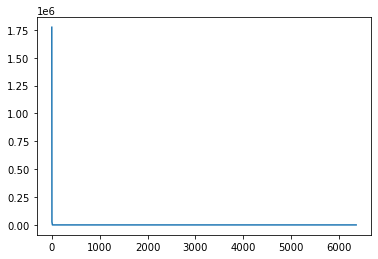

In [68]:
# unique value of each category
test = accepted[['title']].value_counts()
plt.plot(range(len(test)), test)

In [69]:
# rename value to other if they are not in the top 10 categories
top10_index = [col[0] for col in accepted[['title']].value_counts().iloc[:10].index]
accepted['title'] = accepted['title'].apply(lambda x: (x if x in top10_index else 'other') if isinstance(x,str) else x)

In [70]:
#### check the cleaned categories.
accepted[['title']].value_counts().head(20)
#[test.append(i[0].split()) if isinstance(i[0].split(),str) else test.extend(i[0].split()) for i in accepted[['title']].value_counts().keys()]
#from collections import Counter
#sorted(Counter(test).items(), key=lambda x: x[1], reverse=True)
#sorted(Counter(test).items(), key=lambda x: x[0])[6000:]

title        
debt             1774107
other             163204
home              162171
medical            26945
business           23702
vehicle            23696
personal           22233
consolidation      20449
moving             15221
wedding             2868
dtype: int64

In [71]:
#### emp title 436961 unique
#len(accepted['emp_title'].str.lower().value_counts())

In [72]:
# examine unique value in each object col and generate col name not reelated to the prediction.
not_related_cols = ['id','emp_title','sub_grade','zip_code','policy_code']
object_dict_unique

,unique_values,n
term,"[ 36 months, 60 months, nan]",3
grade,"[C, B, F, A, E, D, G, nan]",8
sub_grade,"[C4, C1, B4, C5, F1, C3, B2, B1, A2, B5, C2, E...",36
emp_length,"[10+ years, 3 years, 4 years, 6 years, 1 year,...",12
home_ownership,"[MORTGAGE, RENT, OWN, ANY, nan, NONE, OTHER]",7
verification_status,"[Not Verified, Source Verified, Verified, nan]",4
loan_status,"[Fully Paid, Current, Charged Off, In Grace Pe...",8
pymnt_plan,"[n, y, nan]",3
purpose,"[debt_consolidation, small_business, home_impr...",15
title,"[Debt consolidation, Business, nan, Major purc...",61686


#### define loan status value

**Column Explaination**

revolving loan: A revolving loan facility is a form of credit issued by a financial institution that provides the borrower with the ability to draw down or withdraw, repay, and withdraw again. A revolving loan is considered a flexible financing tool due to its repayment and re-borrowing accommodations.


**Loan status explaination**

Current: Loan is up to date on all outstanding payments. / any loan that is fully paid to date according to a contract.

Fully paid: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
 
 
In Grace Period: Loan is past due but within the 15-day grace period. 
 
Late (16-30): Loan has not been current for 16 to 30 days. Learn more about the tools LendingClub has to deal with delinquent borrowers.
 
Late (31-120): Loan has not been current for 31 to 120 days. Learn more about the tools LendingClub has to deal with delinquent borrowers.
 
Default: Loan has not been current for an extended period of time. 

Charged Off: Loan for which there is no longer a reasonable expectation of further payments. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance.

Default and charged-off:
About 4-6 months after you miss your first payment, your loan will default and then charge-off. 

**From the defination above, charged off and default would be treated as default**


In [73]:
#check unique value counts in the column we want to predict
accepted['loan_status'].value_counts()
# From the table bellow, does not meet the credit policy would be removed

Fully Paid            1076751
Current                878317
Charged Off            268559
Late (31-120 days)      21467
In Grace Period          8436
Late (16-30 days)        4349
Default                    40
Name: loan_status, dtype: int64

In [74]:
# remvove rows that loan_status contains nan
accepted.dropna(subset=['loan_status'],inplace=True)

In [75]:
# find charged off or fully paid off status
selected_status = accepted['loan_status'].apply(lambda x: True if x in ['Fully Paid', 'Charged Off'] else False)

In [76]:
accepted = accepted[selected_status].reset_index(drop=True)

In [77]:
accepted = pd.get_dummies(accepted,columns=['loan_status'], drop_first=True)


In [78]:
accepted.rename(columns={'loan_status_Fully Paid':'loan_status'}, inplace=True)

#### fill missing values

In [79]:
# check the percentage of missing values
accepted[object_dict_unique.index].isnull().mean()*100
# drop verified_status_joint has more than 94 percent of missing values

term                   0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             5.835904
home_ownership         0.000000
verification_status    0.000000
loan_status            0.000000
pymnt_plan             0.000000
purpose                0.000000
title                  1.238302
addr_state             0.000000
initial_list_status    0.000000
application_type       0.000000
dtype: float64

In [80]:
# fill missing cat value with mode
#accepted.drop(columns='loan_status', inplace=True)
accepted['emp_length']=accepted['emp_length'].fillna(accepted['emp_length'].mode()[0])
accepted['title']=accepted['title'].fillna(accepted['title'].mode()[0])

### unique numeric values

In [81]:
# unique numeric values
float_dict_unique=pd.DataFrame.from_dict(float_dict, orient='index').rename(columns={0:'unique_values'})
float_dict_unique['n']=float_dict_unique['unique_values'].apply(len)

In [82]:
# find column with single value
float_dict_unique[float_dict_unique['n']==1].index
# single value: 'member_id'

Index([], dtype='object')

In [83]:
# find column with less than 10% of unique values. (1000 for 10000)
unique_index_1000=float_dict_unique[float_dict_unique['n']>1000].index

In [84]:
# display all columns
single_value_index=[]

numeric_cols=float_dict_unique.drop(index=single_value_index)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(numeric_cols.sort_values('n'))

# policy_code is cat value

,unique_values,n
num_tl_30dpd,"[0.0, 1.0, 2.0, 4.0, 3.0, nan]",6
num_tl_120dpd_2m,"[0.0, nan, 1.0, 2.0, 6.0, 3.0, 7.0, 4.0]",8
acc_now_delinq,"[0.0, 1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 14.0, nan,...",10
inq_last_6mths,"[1.0, 4.0, 0.0, 3.0, 2.0, 5.0, 6.0, nan, 7.0, ...",10
chargeoff_within_12_mths,"[0.0, 1.0, 2.0, 3.0, 6.0, 7.0, 4.0, 5.0, 9.0, ...",12
pub_rec_bankruptcies,"[0.0, 1.0, 2.0, 3.0, 8.0, 4.0, 6.0, 5.0, 7.0, ...",13
collections_12_mths_ex_med,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 6.0,...",17
mths_since_recent_inq,"[4.0, 0.0, 10.0, nan, 1.0, 8.0, 14.0, 11.0, 18...",27
num_tl_op_past_12m,"[3.0, 2.0, 0.0, 1.0, 4.0, 12.0, 6.0, 5.0, 7.0,...",34
num_tl_90g_dpd_24m,"[0.0, 1.0, 2.0, 4.0, 12.0, 3.0, 7.0, 8.0, 5.0,...",35


#### check missing values

In [85]:
# percentage of 0s
float_zeros = pd.DataFrame((accepted[float_dict_unique.index]==0).mean())
float_zeros.columns=['percentage of 0s']

In [86]:
# remove all missing values
accepted.isnull().any(axis=1).sum()/len(accepted) # 0.20573058643822031 possible to remove all rows.

0.20985795095554186

In [87]:
#  remove columns with missing  values more than 50%
float_dict_missing = accepted[float_dict_unique.index].isnull().mean()*100
float_dict_missing = float_dict_unique.join(float_dict_missing.rename('missing percentage'))

Text(0.5, 0, 'column names')

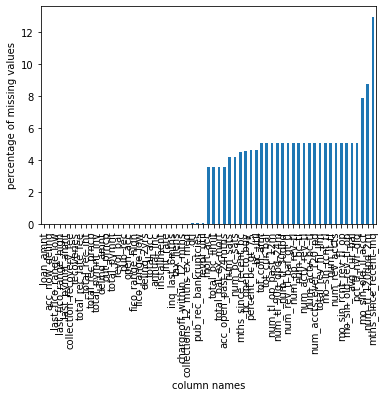

In [88]:
# histogram of misssing
float_dict_missing['missing percentage'].sort_values().plot(kind='bar')
plt.ylabel('percentage of missing values')
plt.xlabel('column names')

In [89]:
# rows with missing value more than 20%
float_dict_missing[float_dict_missing['missing percentage']>20].index

Index([], dtype='object')

In [90]:
#  check the number of rows with full set of data
accepted[float_dict_missing.index].isnull().any(axis=1).sum()

282324

In [91]:
'''
    def df_unique_missing_0s(df):
    numeric_cols=float_dict_unique.drop(index=single_value_index)
    # percentage of 0s
    float_zeros = pd.DataFrame((df[float_dict_unique.index]==0).mean())
    float_zeros.columns=['percentage of 0s']
    # missings
    float_dict_missing = df[float_dict_unique.index].isnull().mean()*100
    float_dict_missing = float_dict_unique.join(float_dict_missing.rename('missing percentage'))
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(numeric_cols.join(float_zeros).join(float_dict_missing['missing percentage']).\
        sort_values(['missing percentage','percentage of 0s'], ascending=False))
'''

"\n    def df_unique_missing_0s(df):\n    numeric_cols=float_dict_unique.drop(index=single_value_index)\n    # percentage of 0s\n    float_zeros = pd.DataFrame((df[float_dict_unique.index]==0).mean())\n    float_zeros.columns=['percentage of 0s']\n    # missings\n    float_dict_missing = df[float_dict_unique.index].isnull().mean()*100\n    float_dict_missing = float_dict_unique.join(float_dict_missing.rename('missing percentage'))\n    with pd.option_context('display.max_rows', None, 'display.max_columns', None):\n        display(numeric_cols.join(float_zeros).join(float_dict_missing['missing percentage']).        sort_values(['missing percentage','percentage of 0s'], ascending=False))\n"

In [92]:
#accepted_trimed=accepted.drop(columns='mths_since_recent_inq').dropna()
# could not use trimed version because it significantly remove default data

In [93]:
# summary of unique value, percentage of 0s in the list, and persentage of missing values.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(numeric_cols.join(float_zeros).join(float_dict_missing['missing percentage']).\
        sort_values(['missing percentage','percentage of 0s'], ascending=False))

,unique_values,n,percentage of 0s,missing percentage
mths_since_recent_inq,"[4.0, 0.0, 10.0, nan, 1.0, 8.0, 14.0, 11.0, 18...",27,8.010644e-02,12.939100
num_tl_120dpd_2m,"[0.0, nan, 1.0, 2.0, 6.0, 3.0, 7.0, 4.0]",8,9.120225e-01,8.726688
mo_sin_old_il_acct,"[148.0, 113.0, 125.0, 36.0, 128.0, 338.0, 142....",567,8.919877e-06,7.847634
pct_tl_nvr_dlq,"[76.9, 97.4, 100.0, 96.6, 96.3, 93.3, 95.7, 94...",691,2.973292e-06,5.030885
avg_cur_bal,"[20701.0, 9733.0, 31617.0, 23192.0, 27644.0, 2...",88598,2.742862e-04,5.021073
mo_sin_rcnt_rev_tl_op,"[3.0, 2.0, 14.0, 4.0, 32.0, 10.0, 1.0, 15.0, 9...",334,1.514075e-02,5.019512
num_rev_accts,"[9.0, 27.0, 7.0, 13.0, 19.0, 4.0, 16.0, 3.0, 1...",118,7.433231e-07,5.019512
mo_sin_old_rev_tl_op,"[128.0, 192.0, 184.0, 87.0, 210.0, 54.0, 306.0...",788,0.000000e+00,5.019512
num_tl_30dpd,"[0.0, 1.0, 2.0, 4.0, 3.0, nan]",6,9.467520e-01,5.019438
num_tl_90g_dpd_24m,"[0.0, 1.0, 2.0, 4.0, 12.0, 3.0, 7.0, 8.0, 5.0,...",35,8.953565e-01,5.019438


#### check the correlation value

In [94]:
accepted['loan_status'].value_counts()

1    1076751
0     268559
Name: loan_status, dtype: int64

<AxesSubplot:>

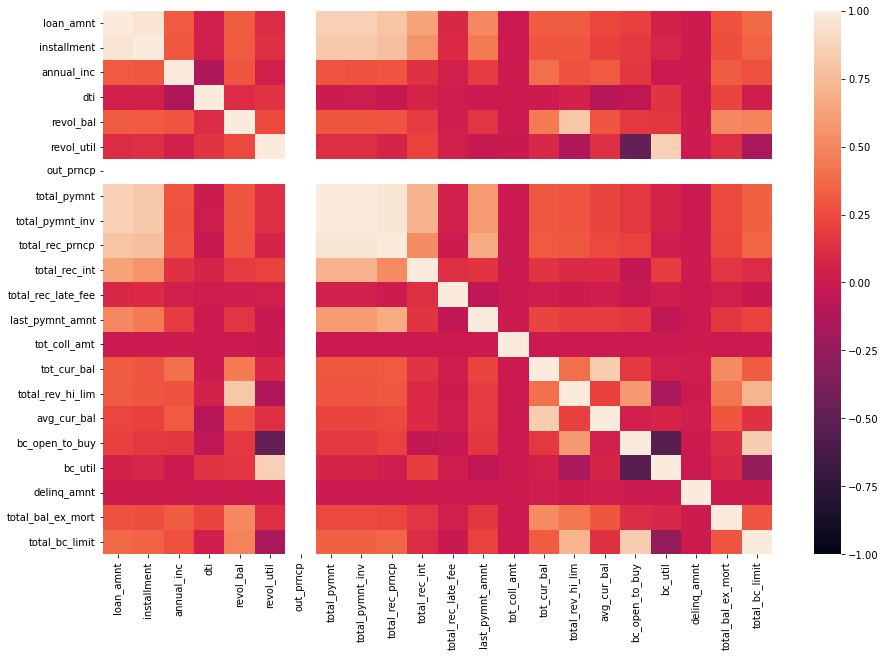

In [95]:
# check the correlation of the column that contains numeric values
accepted_numeric_corr = accepted[unique_index_1000].drop(columns=['recoveries','collection_recovery_fee']).corr()

plt.figure(figsize=(15,10))
sns.heatmap(accepted_numeric_corr,vmin=-1, vmax=1)

Multiple features are correlated, it is important to work on feature selection

In [96]:
# generate colname and correlations
accepted_numeric_corr_melt = accepted_numeric_corr.reset_index(drop=False).melt('index', var_name='var2', value_name='corr')
accepted_numeric_corr_melt = accepted_numeric_corr_melt.rename(columns={'index':'var1'})
highly_corr_cols = accepted_numeric_corr_melt[(abs(accepted_numeric_corr_melt['corr'])>0.5) & (accepted_numeric_corr_melt['var1']!=accepted_numeric_corr_melt['var2'])]
highly_corr_cols['combine'] = (highly_corr_cols['var1']+highly_corr_cols['var2']).apply(lambda x: ''.join(sorted(x)))

/var/folders/70/ll1skxk97lv5v5kym9b6wrpm0000gn/T/ipykernel_21678/3247337182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highly_corr_cols['combine'] = (highly_corr_cols['var1']+highly_corr_cols['var2']).apply(lambda x: ''.join(sorted(x)))


In [97]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    highly_corr_cols=highly_corr_cols.sort_values('corr', ascending=False).drop_duplicates(subset='combine')
    display(highly_corr_cols)

,var1,var2,corr,combine
162,total_pymnt_inv,total_pymnt,0.999293,___aaillmmnnnooppttttttvyy
205,total_pymnt,total_rec_prncp,0.967172,___aaccellmnnooppprrttttty
206,total_pymnt_inv,total_rec_prncp,0.966541,____aacceillmnnnooppprrtttttvy
1,installment,loan_amnt,0.953401,_aaaeilllmmnnnnosttt
401,revol_util,bc_util,0.855022,__bceiilllorttuuv
154,loan_amnt,total_pymnt,0.854348,__aaallmmnnnooptttty
176,loan_amnt,total_pymnt_inv,0.853857,___aaaillmmnnnnoopttttvy
479,bc_open_to_buy,total_bc_limit,0.838803,_____abbbcceiillmnooopttttuy
366,tot_cur_bal,avg_cur_bal,0.835041,____aaabbccgllorrttuuv
29,total_pymnt,installment,0.815842,_aaeilllmmnnnopsttttty


total_pymnt_inv total_pymnt


<Figure size 432x288 with 0 Axes>

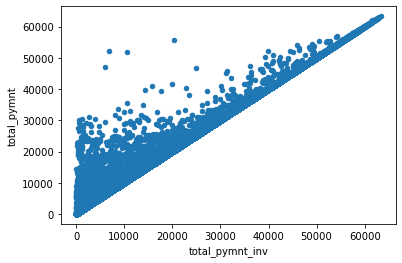

total_pymnt total_rec_prncp


<Figure size 432x288 with 0 Axes>

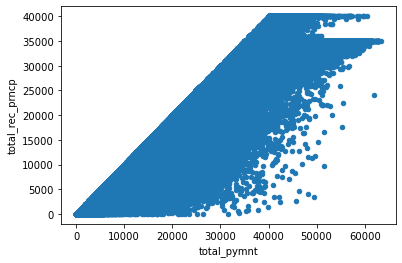

total_pymnt_inv total_rec_prncp


<Figure size 432x288 with 0 Axes>

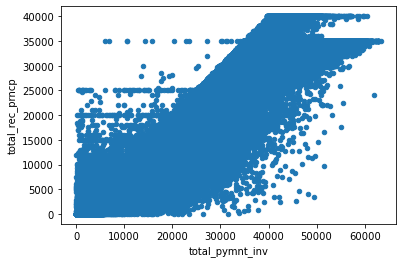

installment loan_amnt


<Figure size 432x288 with 0 Axes>

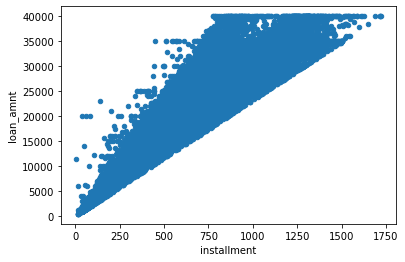

revol_util bc_util


<Figure size 432x288 with 0 Axes>

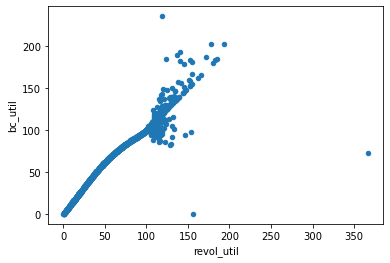

loan_amnt total_pymnt


<Figure size 432x288 with 0 Axes>

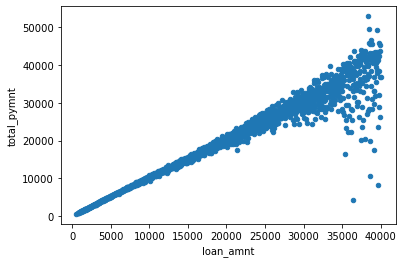

loan_amnt total_pymnt_inv


<Figure size 432x288 with 0 Axes>

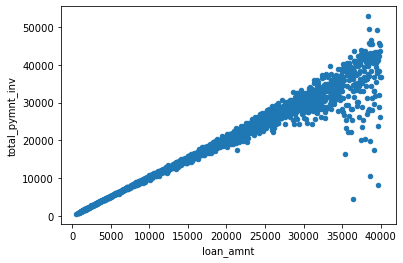

bc_open_to_buy total_bc_limit


<Figure size 432x288 with 0 Axes>

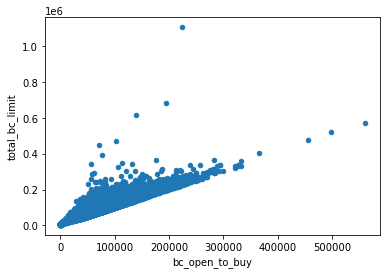

tot_cur_bal avg_cur_bal


<Figure size 432x288 with 0 Axes>

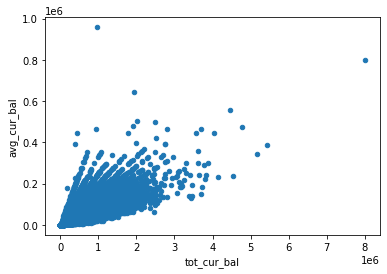

total_pymnt installment


<Figure size 432x288 with 0 Axes>

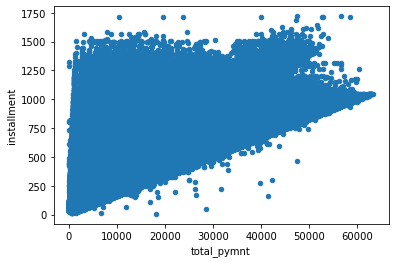

installment total_pymnt_inv


<Figure size 432x288 with 0 Axes>

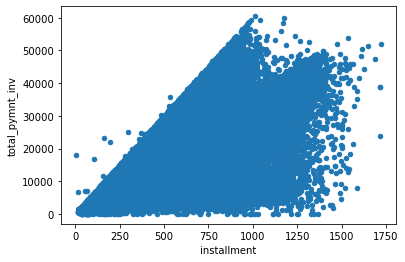

revol_bal total_rev_hi_lim


<Figure size 432x288 with 0 Axes>

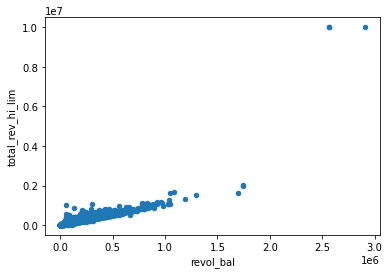

total_rec_prncp loan_amnt


<Figure size 432x288 with 0 Axes>

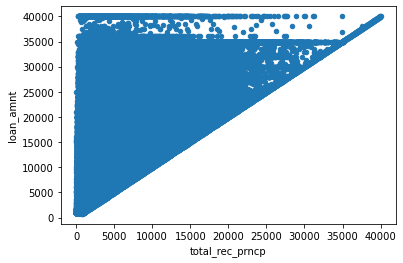

installment total_rec_prncp


<Figure size 432x288 with 0 Axes>

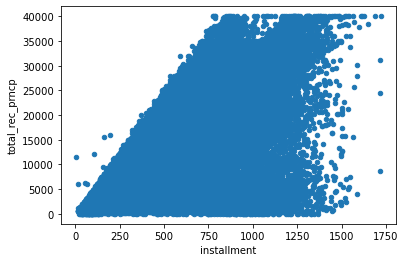

total_rev_hi_lim total_bc_limit


<Figure size 432x288 with 0 Axes>

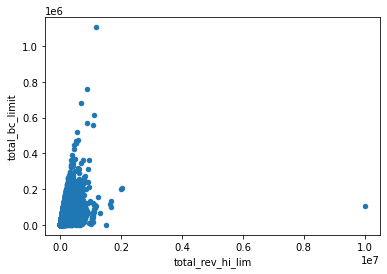

total_pymnt total_rec_int


<Figure size 432x288 with 0 Axes>

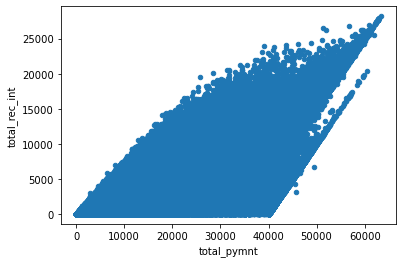

total_rec_int total_pymnt_inv


<Figure size 432x288 with 0 Axes>

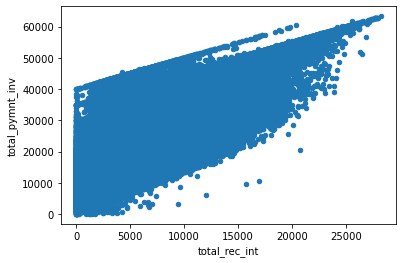

last_pymnt_amnt total_rec_prncp


<Figure size 432x288 with 0 Axes>

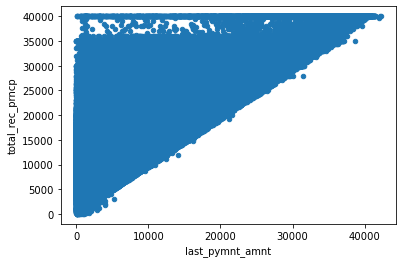

loan_amnt total_rec_int


<Figure size 432x288 with 0 Axes>

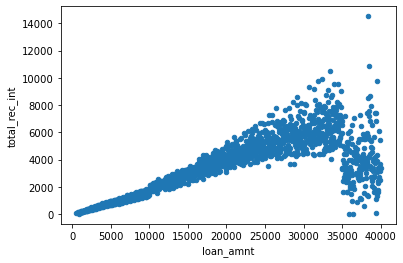

last_pymnt_amnt total_pymnt_inv


<Figure size 432x288 with 0 Axes>

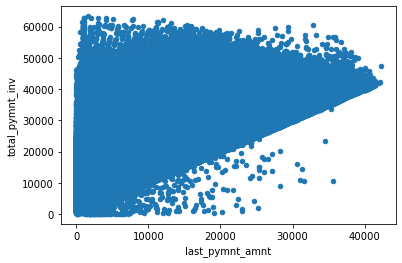

last_pymnt_amnt total_pymnt


<Figure size 432x288 with 0 Axes>

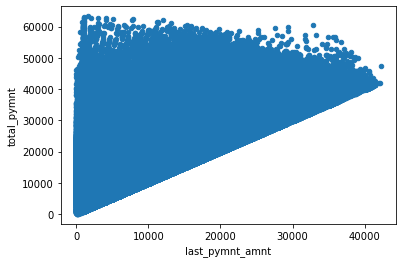

bc_open_to_buy total_rev_hi_lim


<Figure size 432x288 with 0 Axes>

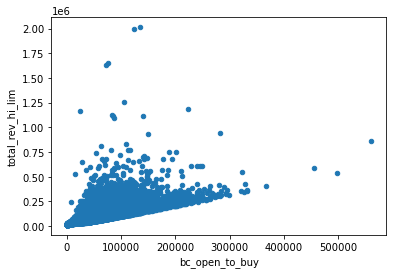

installment total_rec_int


<Figure size 432x288 with 0 Axes>

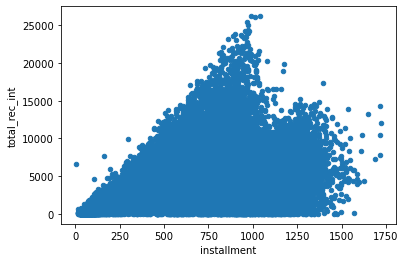

total_rec_prncp total_rec_int


<Figure size 432x288 with 0 Axes>

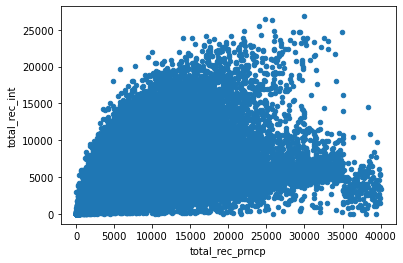

total_bal_ex_mort tot_cur_bal


<Figure size 432x288 with 0 Axes>

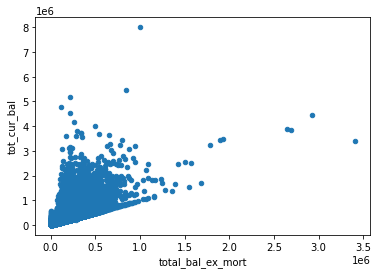

total_bal_ex_mort revol_bal


<Figure size 432x288 with 0 Axes>

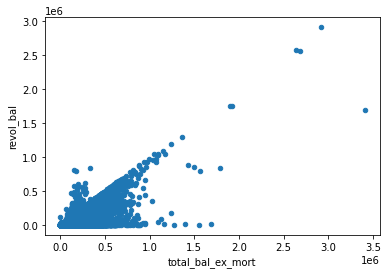

last_pymnt_amnt loan_amnt


<Figure size 432x288 with 0 Axes>

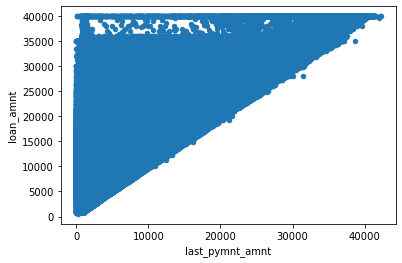

bc_util bc_open_to_buy


<Figure size 432x288 with 0 Axes>

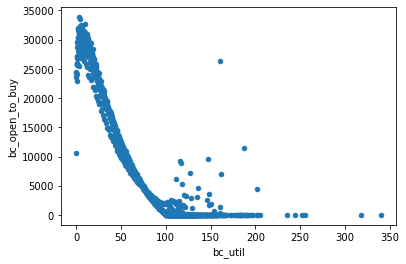

In [98]:
# plot correlation with corr>0.5
for v1,v2 in highly_corr_cols[['var1','var2']].values:
    print(v1,v2)
    plt.figure()
    #plt.scatter(accepted[v1], accepted[[v1,v2]].groupby(v1).mean().reset_index()[v2])
    accepted[[v1,v2]].groupby(v1).mean().reset_index().plot(kind='scatter', x=v1,y=v2)
    plt.show()
# drop on in:
# out_prncp/out_prncp_inv; funded_amnt/loan_amnt; loan_amnt/funded_amnt_inv; tot_cur_bal/tot_hi_cred_lim;
# total_il_high_credit_limit/total_bal_ex_mort; 


In [99]:
# out_prncp/out_prncp_inv; tot_cur_bal/tot_hi_cred_lim;
# total_il_high_credit_limit/total_bal_ex_mort; 
high_corr_cols = ['out_prncp_inv','funded_amnt','funded_amnt_inv','tot_hi_cred_lim','total_il_high_credit_limit']

**delinquent**: Delinquency means that you are behind on payments. Once you are delinquent for a certain period of time (usually nine months for federal loans), your lender will declare the loan to be in default. The entire loan balance will become due at that time.

**trades**: Trade finance represents the financial instruments and products that are used by companies to facilitate international trade and commerce.

#### fill missing

In [100]:
float_dict_missing[float_dict_missing['missing percentage']>0].sort_values('n', ascending=False)
# below 20 use mode, above 20 use median
for col in float_dict_missing.index:
    if float_dict_missing.loc[col,'n']>20:
        accepted[col].fillna(accepted[col].median(),inplace=True)
    else:
        accepted[col].fillna(accepted[col].mode()[0], inplace=True)

In [101]:
# check if there is any missing value in the df
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pd.DataFrame(accepted.isnull().mean()).sort_values(0))

,0
loan_amnt,0.0
mths_since_recent_inq,0.0
mths_since_recent_bc,0.0
mort_acc,0.0
mo_sin_rcnt_tl,0.0
mo_sin_rcnt_rev_tl_op,0.0
mo_sin_old_rev_tl_op,0.0
mo_sin_old_il_acct,0.0
delinq_amnt,0.0
chargeoff_within_12_mths,0.0


In [102]:
#accepted.to_csv('./cleaned dataset v1.csv')

## EDA

loan status is fully paid status

In [12]:
# import cleaned dataset
accepted_cleaned = pd.read_csv('./cleaned dataset v2.csv')
accepted_cleaned.drop(columns=['Unnamed: 0'],inplace=True)
accepted_cleaned.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit
0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,0,...,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,7746.0,2400.0
1,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,0,...,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,39475.0,79300.0
2,20000.0,60 months,10.78,432.66,B,10+ years,MORTGAGE,63000.0,Not Verified,0,...,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,18696.0,6200.0
3,35000.0,60 months,14.85,829.90,C,10+ years,MORTGAGE,110000.0,Source Verified,0,...,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,52226.0,62500.0
4,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,0,...,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,95768.0,20300.0


In [13]:
accepted_cleaned.loan_status.value_counts()

0    1992069
1     268599
Name: loan_status, dtype: int64

In [14]:
accepted_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 75 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   term                        object 
 2   int_rate                    float64
 3   installment                 float64
 4   grade                       object 
 5   emp_length                  object 
 6   home_ownership              object 
 7   annual_inc                  float64
 8   verification_status         object 
 9   loan_status                 int64  
 10  pymnt_plan                  object 
 11  purpose                     object 
 12  title                       object 
 13  addr_state                  object 
 14  dti                         float64
 15  delinq_2yrs                 float64
 16  fico_range_low              float64
 17  fico_range_high             float64
 18  inq_last_6mths              float64
 19  open_acc             

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


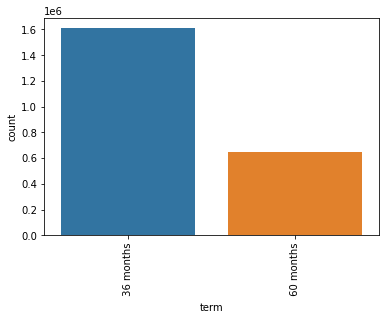

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


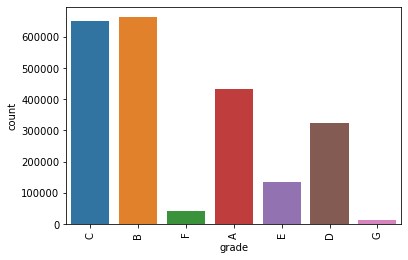

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


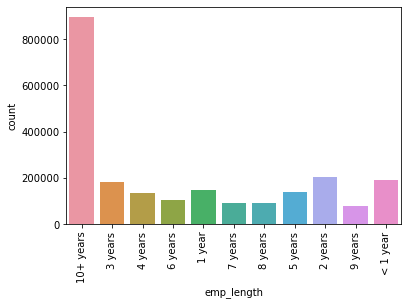

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


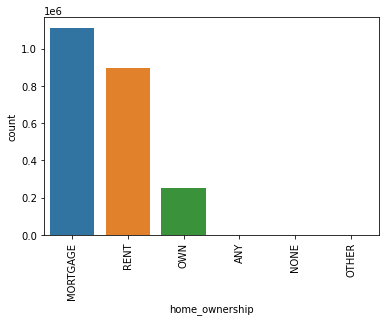

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


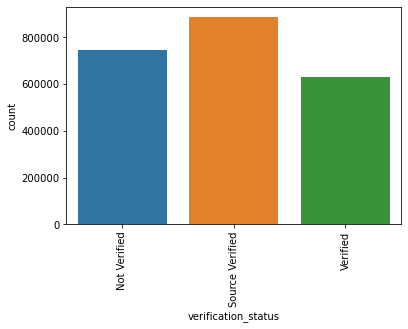

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


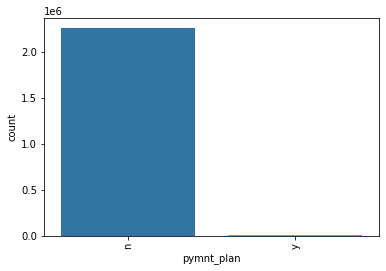

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


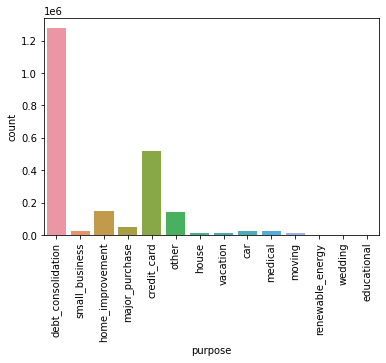

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


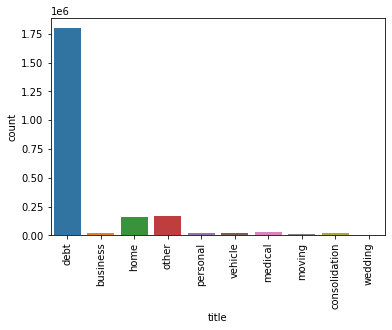

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


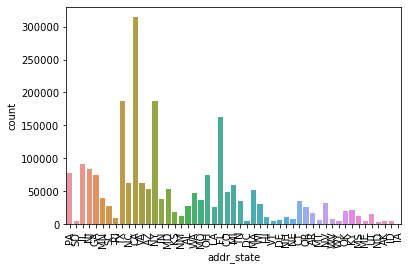

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


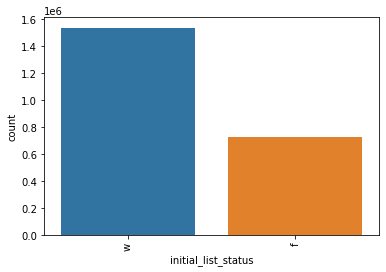

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


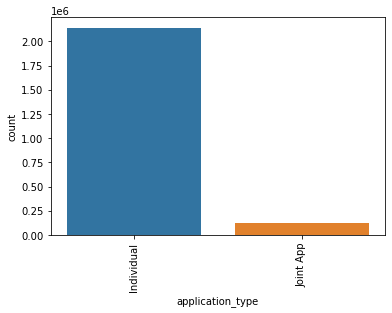

In [15]:
# frequency of the of each type
for col in accepted_cleaned.select_dtypes('object').columns:
    sns.countplot(accepted_cleaned[col])
    plt.xticks(rotation = 90)
    plt.show()

In [16]:
from scipy.stats import chi2_contingency, levene, ttest_ind

In [17]:
# grade, subgrade,term, and default chi-squared test
def chi2(col):
    grade_pivot = pd.pivot_table(accepted_cleaned, values='loan_amnt', index=col, columns='loan_status', aggfunc='count')
    _, p, _, _ = chi2_contingency(grade_pivot)
    return p

def tt(col):
    t1 = accepted_cleaned[accepted_cleaned['loan_status']==0][col]
    t2 = accepted_cleaned[accepted_cleaned['loan_status']==0][col]
    evar= levene(np.log(t1), np.log(t2))[1]
    if evar>0.05:
        tp = ttest_ind(np.sqrt(t1),np.sqrt(t2), equal_var=True)[1]
    else:
        tp = ttest_ind(np.sqrt(t1),np.sqrt(t2), equal_var=False)[1]
    return tp

In [23]:
# chi-sqaure test for cat value
cat_results = {i:chi2(i) for i in accepted_cleaned.select_dtypes('O').columns}

# two sample t-test for two samples
two_sample_results = {i:tt(i) for i in accepted_cleaned.select_dtypes('float').columns}

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2594: RuntimeWarning: invalid value encountered in subtract
  numer = (Ntot - k) * np.sum(Ni * (Zbari - Zbar)**2, axis=0)
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2599: RuntimeWarning: invalid value encountered in subtract
  dvar += np.sum((Zij[i] - Zbari[i])**2, axis=0)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2584: RuntimeWarning: invalid value en

In [24]:
cat_results
pd.DataFrame.from_dict(cat_results, orient='index').rename(columns={0:'p-value'})

,p-value
term,0.000000e+00
grade,0.000000e+00
emp_length,1.823531e-64
home_ownership,0.000000e+00
verification_status,0.000000e+00
pymnt_plan,NaN
purpose,0.000000e+00
title,0.000000e+00
addr_state,0.000000e+00
initial_list_status,0.000000e+00


In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pd.DataFrame.from_dict(two_sample_results, orient='index').rename(columns={0:'p-value'}).sort_values(by='p-value'))

,p-value
loan_amnt,1.0
chargeoff_within_12_mths,1.0
delinq_amnt,1.0
mo_sin_old_il_acct,1.0
mo_sin_old_rev_tl_op,1.0
mo_sin_rcnt_rev_tl_op,1.0
mo_sin_rcnt_tl,1.0
mort_acc,1.0
mths_since_recent_bc,1.0
mths_since_recent_inq,1.0


In [ ]:
plt.subplot(1,2,1)
sns.histplot(accepted_cleaned['dti'])
plt.subplot(1,2,2)
sns.histplot(accepted_cleaned['total_rec_late_fee'])


In [ ]:
pd.pivot_table(accepted_cleaned, values='loan_amnt', index='pymnt_plan', columns='loan_status', aggfunc='count')

loan_status,0,1
pymnt_plan,,
n,268559,1076751


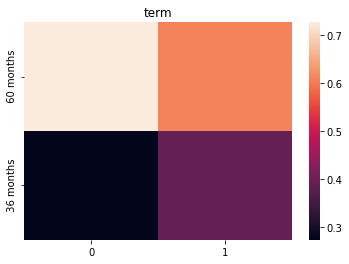

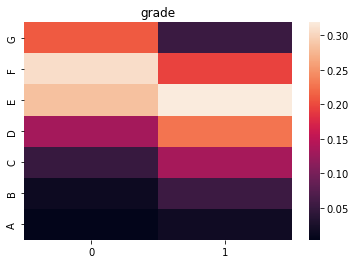

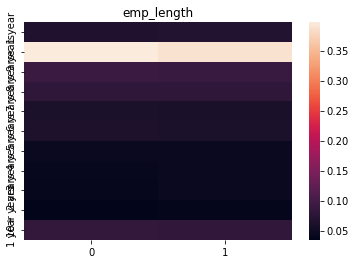

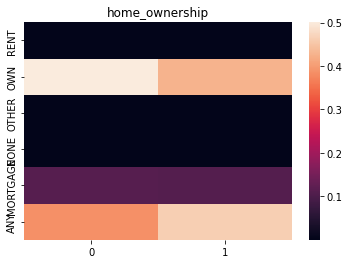

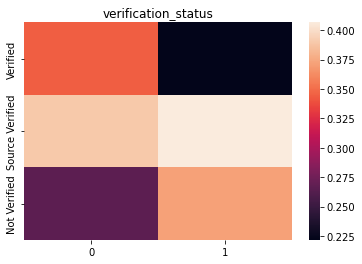

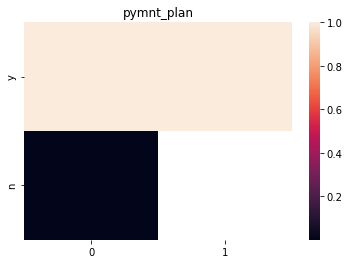

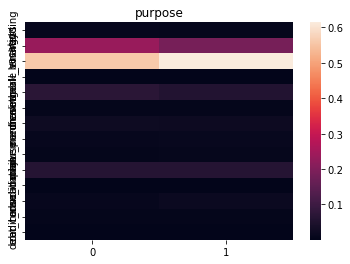

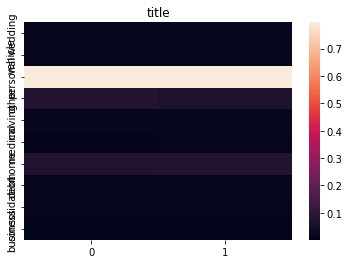

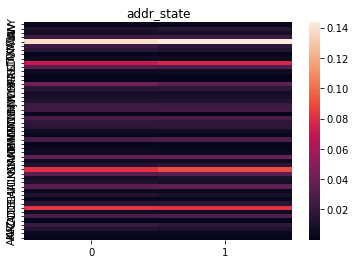

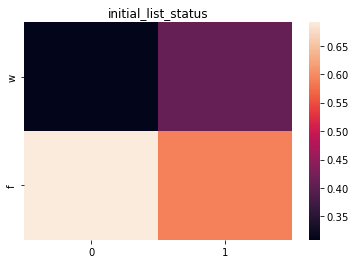

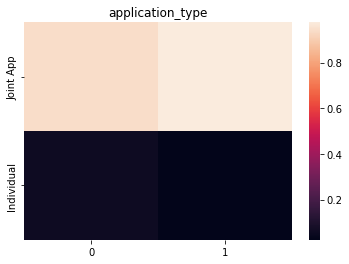

In [22]:
for col in accepted_cleaned.select_dtypes('O').columns:
    try:
        current_table = pd.pivot_table(accepted_cleaned, values='loan_amnt', index=col, columns='loan_status', aggfunc='count')
        sns.heatmap(np.divide(current_table.values,current_table.sum(axis=0).values))
        plt.yticks([i+0.5 for i in range(len(current_table.index)-1,-1,-1)],labels=current_table.index.to_list())
        plt.title(col)
        plt.show()
    except:
        print(col)

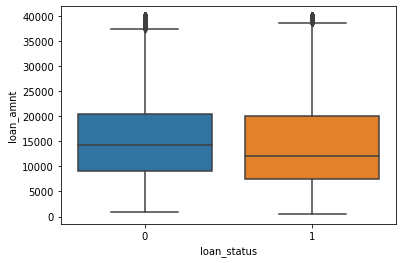

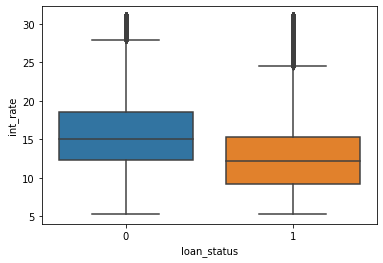

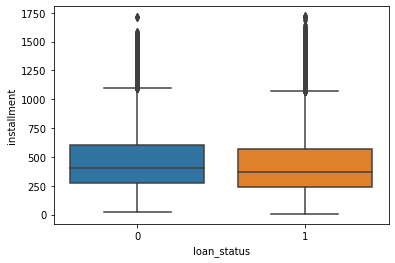

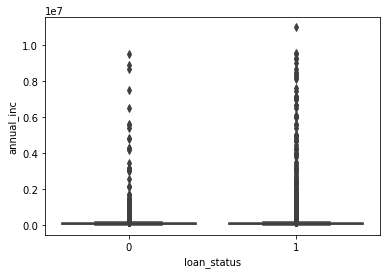

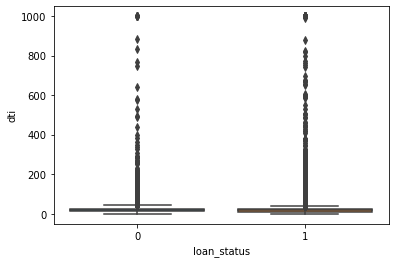

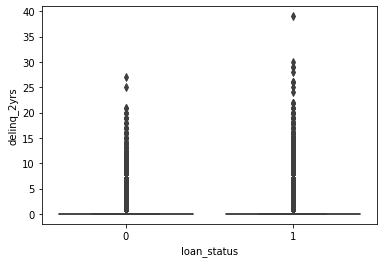

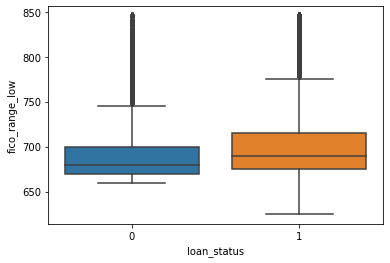

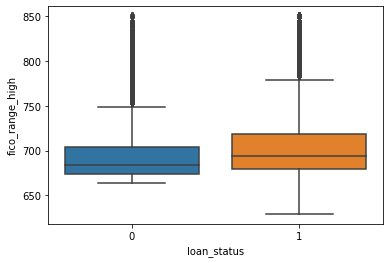

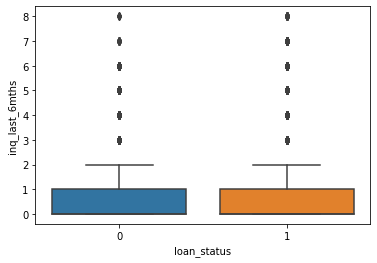

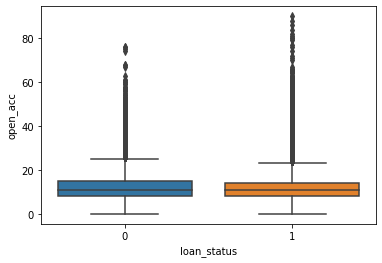

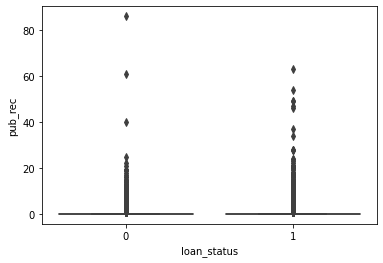

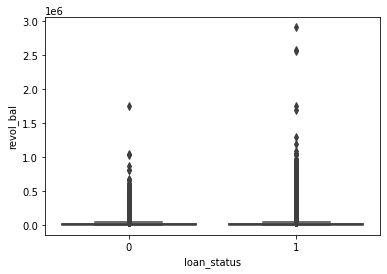

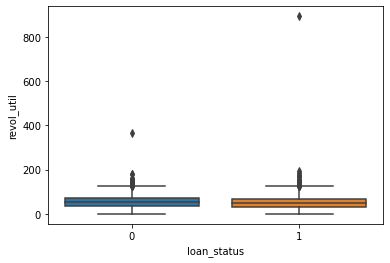

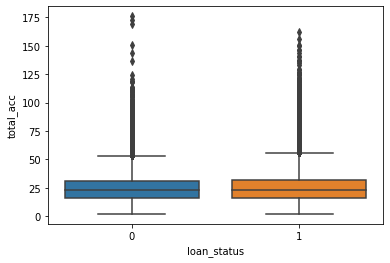

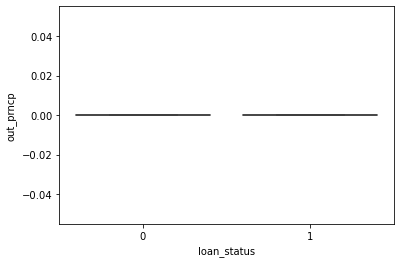

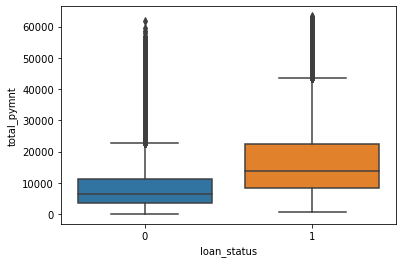

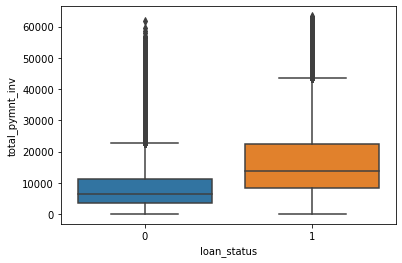

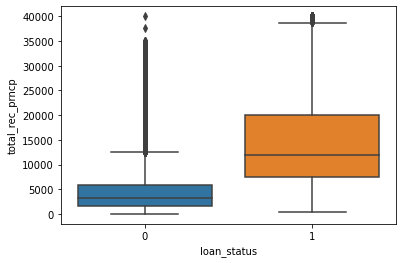

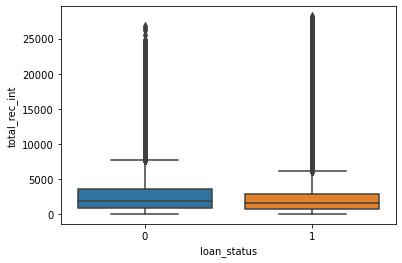

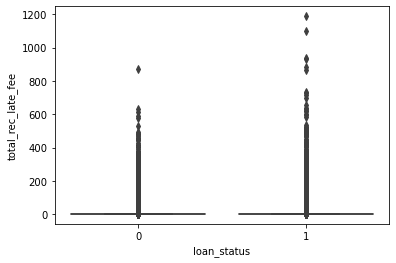

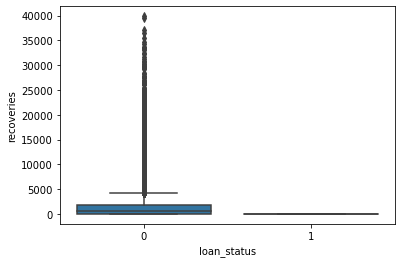

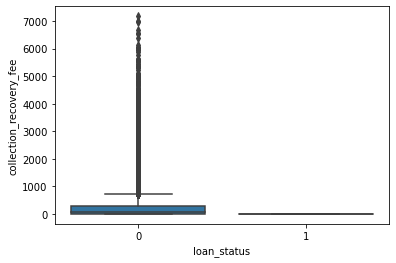

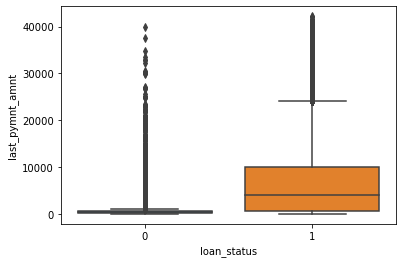

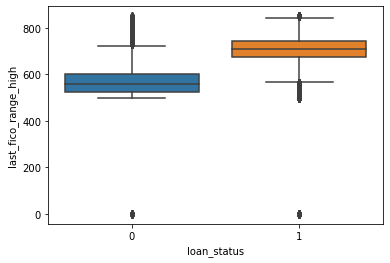

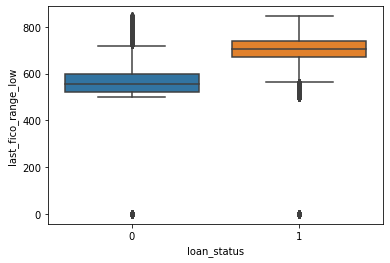

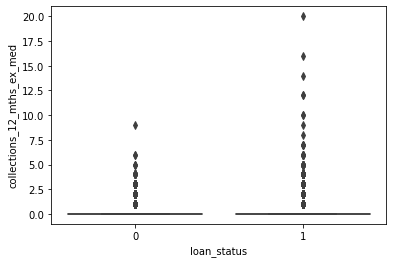

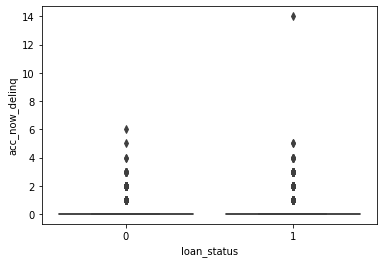

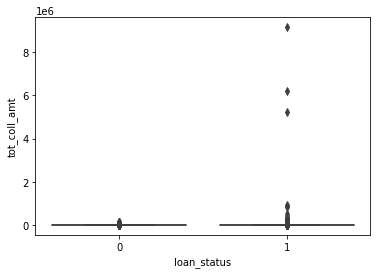

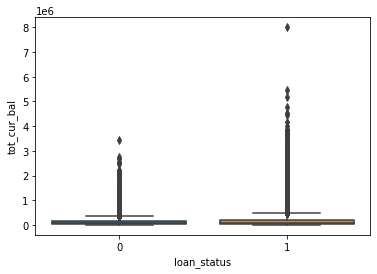

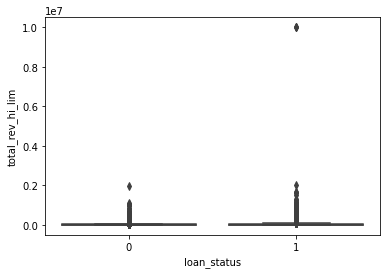

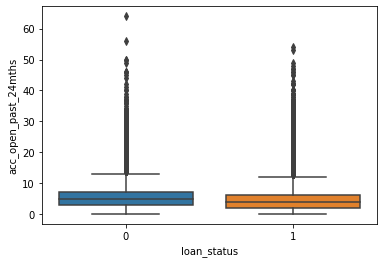

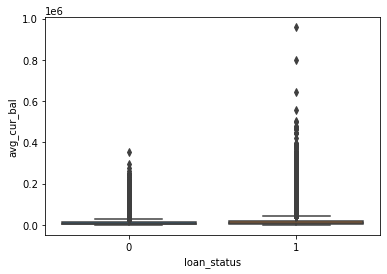

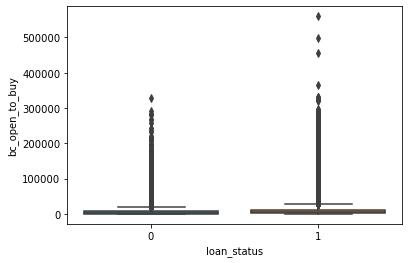

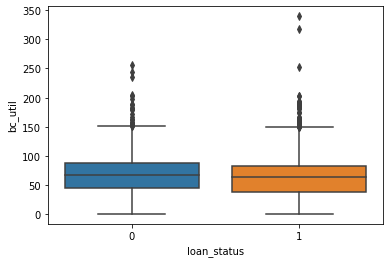

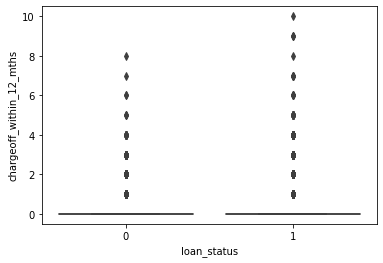

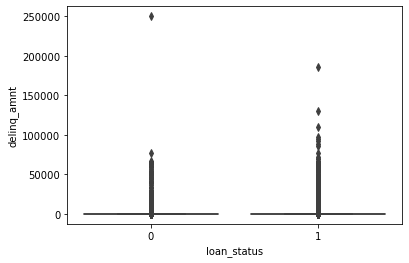

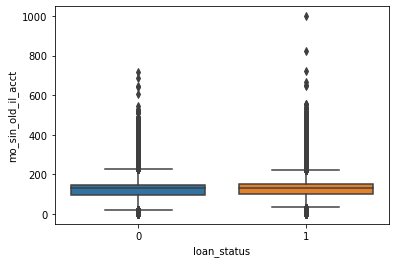

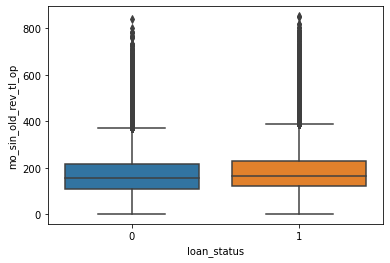

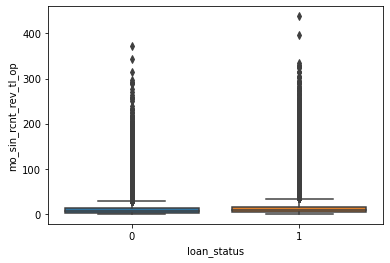

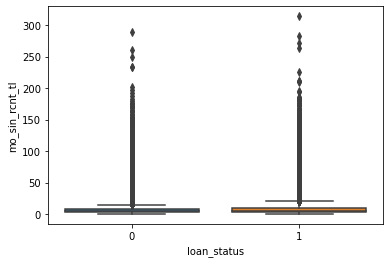

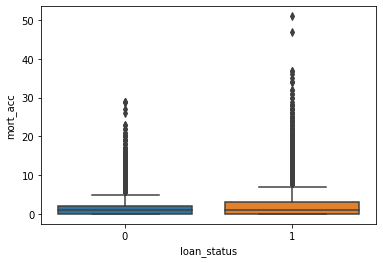

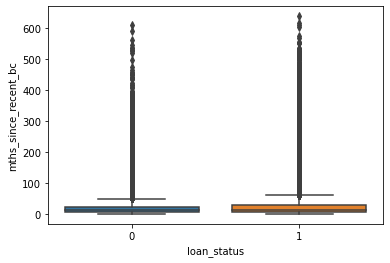

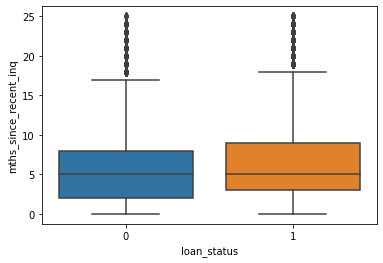

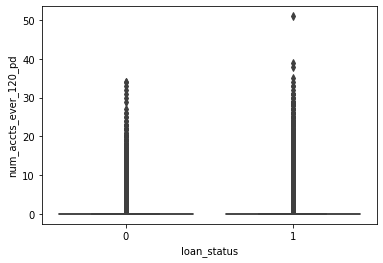

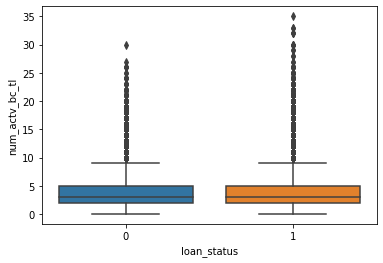

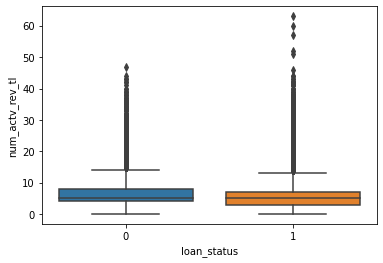

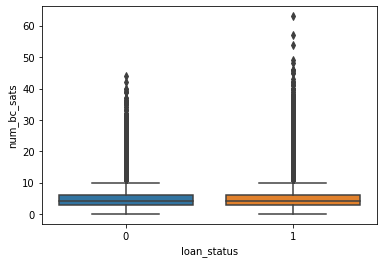

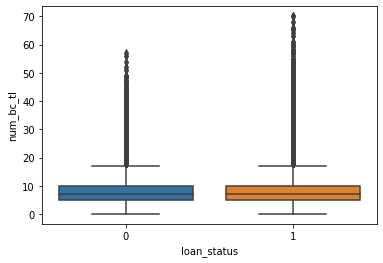

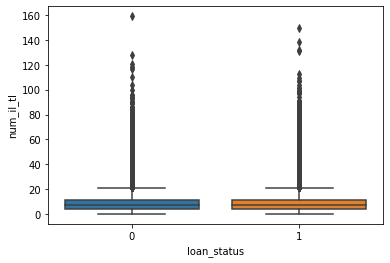

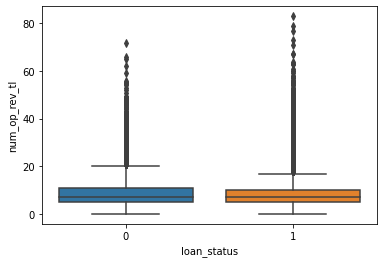

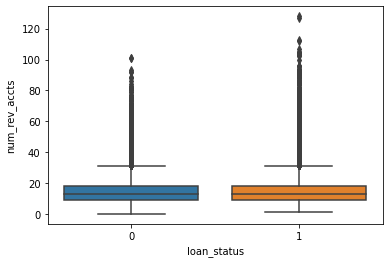

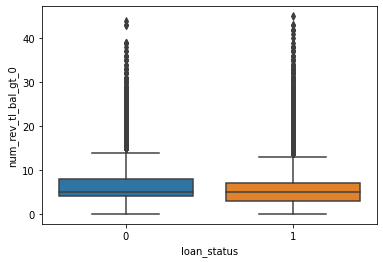

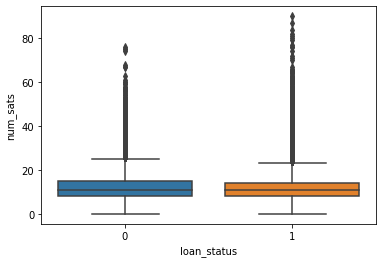

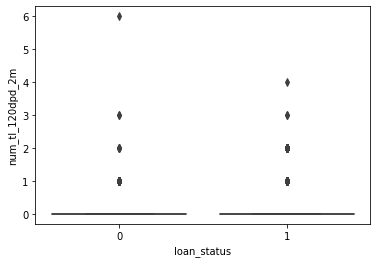

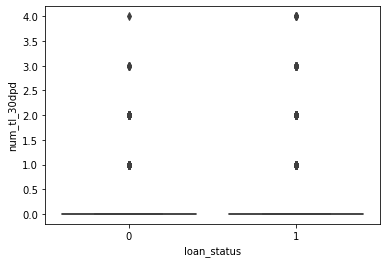

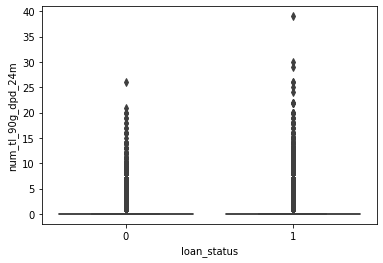

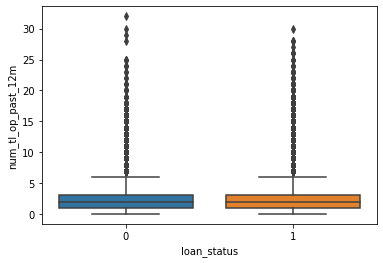

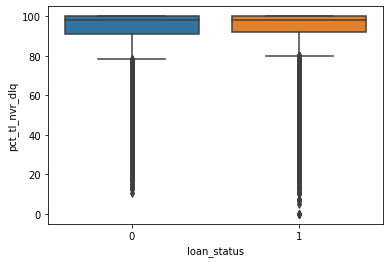

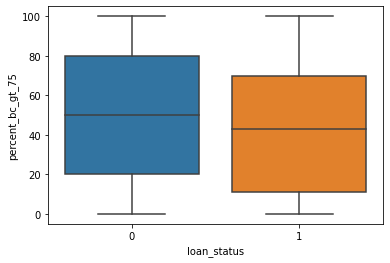

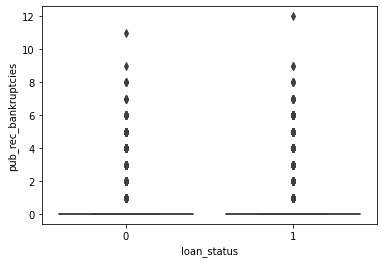

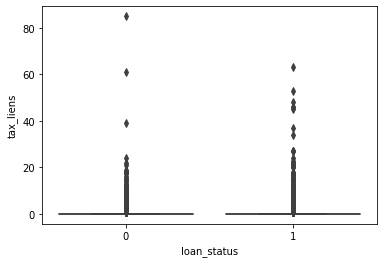

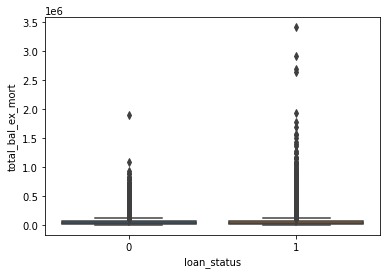

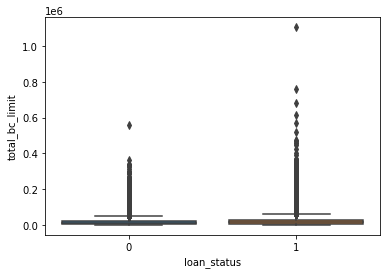

In [ ]:
# boxplot of object
for col in accepted_cleaned.select_dtypes('float').columns:
    sns.boxplot(y=col, x='loan_status',  data=accepted_cleaned)
    plt.show()